In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
class Ex1Func(object):
    
    def __init__(self, sigma=lambda x: 0.5):
        self.sigma = sigma

    def __call__(self, x):
        
        if x[0] < 0.5:
            return x[0]**2. +  self.sigma(x[0]) * np.random.randn()
        if x[0] == 0.5:
            return 1.
        if x[0] > 0.5:
            return 2. - (x[0]-0.5) ** 2.

In [3]:
from pyDOE import *

Text(0,0.5,u'$y$')

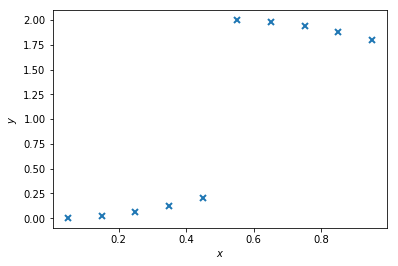

In [4]:
dim = 1
n = 10
noise=0
sigma = eval('lambda x: ' + str(noise))
objective = Ex1Func(sigma=sigma)
X = lhs(dim, n , criterion='center')
Y = np.array([objective(x) for x in X])[:, None]



#Xm = np.mean(X)
#Xv = np.std(X)
Xnorm = (X - 0.5) / 0.5

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [5]:
#build the model
k1 = hetero_kernels.RBF(1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptiveLengthscale(Xnorm, Y, k1, nonstat)

In [6]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp.kern1.variance,[ 1.],None,+ve
adaptive_lengthscale_gp.likelihood.variance,[ 1.],None,+ve
adaptive_lengthscale_gp.nonstat.signal_variance,[ 1.],None,+ve


In [7]:
#m.kern1.lengthscales = .5
#m.kern1.lengthscales.fixed = True
#m.kern1.variance = 1.
#m.kern1.variance.fixed = True
m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)

m.likelihood.variance = 0.001
m.likelihood.variance.fixed = True

#m.nonstat.signal_variance = 2.
#m.nonstat.signal_variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)

In [8]:
m.optimize(maxiter=5000) # start near MAP

      fun: array([ 1.2529574])
 hess_inv: <23x23 LbfgsInvHessProduct with dtype=float64>
      jac: array([  6.94147754e-04,  -3.33416644e-06,  -4.96216509e-04,
         3.17387350e-04,  -1.23579941e-05,  -5.22974862e-05,
        -1.03763223e-04,   2.25456079e-04,  -1.26688551e-04,
        -3.67557616e-05,   1.40515216e-03,   1.47072053e-03,
        -4.50955265e-04,   5.89970188e-04,  -1.23512952e-03,
        -1.53072305e-03,   4.13160520e-04,  -3.27963031e-04,
        -1.87025368e-04,   1.15783799e-04,   6.75756984e-04,
        -2.42918404e-04,   4.75752503e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 446
      nit: 408
   status: 0
  success: True
        x: array([-1.04785317, -1.05000296,  0.20688137, -0.03592805, -0.01718404,
       -0.02212865, -0.00505331,  0.00733842, -0.00225804, -0.00419301,
        1.38812548, -0.11836833,  0.66772967,  0.90748697,  0.26459453,
       -0.1137916 ,  0.26094766, -0.14329058, -0.10963962, -0.2319268 ,
       -0.

In [9]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[-1.04785317] [-1.05000296] [ 0.20688137] [-0.03592805] [-0.01718404] [-0.02212865] [-0.00505331] [ 0.00733842] [-0.00225804] [-0.00419301]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 1.38812548] [-0.11836833] [ 0.66772967] [ 0.90748697] [ 0.26459453] [-0.1137916 ] [ 0.26094766] [-0.14329058] [-0.10963962] [-0.2319268 ]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 0.52761973],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp.kern1.variance,[ 1.54231255],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp.likelihood.variance,[ 0.001],None,[FIXED]
adaptive_lengthscale_gp.nonstat.signal_variance,[ 2.03042813],"Ga([ 1.],[ 1.])",+ve


In [10]:
samples = m.sample(1000, verbose=True, epsilon=0.005, thin = 2, burn = 1000, Lmax = 160)

burn-in sampling started
Iteration:  100 	 Acc Rate:  96.0 %
Iteration:  200 	 Acc Rate:  96.0 %
Iteration:  300 	 Acc Rate:  84.0 %
Iteration:  400 	 Acc Rate:  93.0 %
Iteration:  500 	 Acc Rate:  82.0 %
Iteration:  600 	 Acc Rate:  87.0 %
Iteration:  700 	 Acc Rate:  86.0 %
Iteration:  800 	 Acc Rate:  95.0 %
Iteration:  900 	 Acc Rate:  94.0 %
Iteration:  1000 	 Acc Rate:  95.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  80.0 %
Iteration:  200 	 Acc Rate:  57.0 %
Iteration:  300 	 Acc Rate:  91.0 %
Iteration:  400 	 Acc Rate:  96.0 %
Iteration:  500 	 Acc Rate:  95.0 %
Iteration:  600 	 Acc Rate:  96.0 %
Iteration:  700 	 Acc Rate:  96.0 %
Iteration:  800 	 Acc Rate:  91.0 %
Iteration:  900 	 Acc Rate:  98.0 %
Iteration:  1000 	 Acc Rate:  88.0 %
Iteration:  1100 	 Acc Rate:  96.0 %
Iteration:  1200 	 Acc Rate:  97.0 %
Iteration:  1300 	 Acc Rate:  89.0 %
Iteration:  1400 	 Acc Rate:  88.0 %
Iteration:  1500 	 Acc Rate:  95.0 %
Iteration:  1600 	 Acc Rate:  91.0 %
Iteratio

In [11]:
xnew = np.linspace(0,1,50)[:,None]
xx = (xnew - 0.5)/0.5

In [12]:
sample_df = m.get_samples_df(samples)

In [13]:
sample_df

,adaptive_lengthscale_gp.V1,adaptive_lengthscale_gp.V2,adaptive_lengthscale_gp.kern1.lengthscales,adaptive_lengthscale_gp.kern1.variance,adaptive_lengthscale_gp.likelihood.variance,adaptive_lengthscale_gp.nonstat.signal_variance
0,"[[-0.0507207118833], [1.82468669229], [0.30892...","[[2.011129759], [-0.958110311742], [0.70718019...",[0.273827729463],[1.32136681583],[0.001],[0.9212035047]
1,"[[0.143752063848], [1.68532028663], [0.3652992...","[[2.10678244526], [-1.3680588226], [0.56982384...",[0.295137746444],[1.24340493403],[0.001],[0.871648501888]
2,"[[0.159048295006], [1.48132832562], [0.5292901...","[[1.75400291435], [-1.20333926958], [0.9761863...",[0.250755996345],[1.4340709978],[0.001],[1.26348214584]
3,"[[-0.598014656256], [2.09293618256], [0.523048...","[[2.12929788033], [-0.602938785022], [1.112059...",[0.293537074904],[1.43013574946],[0.001],[0.881413963504]
4,"[[-0.243173438808], [2.12582562516], [0.031342...","[[2.38966549794], [-0.75438011263], [0.8477647...",[0.334671426369],[1.58993456961],[0.001],[0.662042824337]
5,"[[-0.13016611006], [1.99991599378], [0.2824317...","[[1.95545942771], [-1.00571452236], [0.6304918...",[0.429397526259],[1.5003510943],[0.001],[1.06615450046]
6,"[[-0.0777639636577], [1.59632073444], [0.10621...","[[2.08902136619], [-1.2559887933], [0.55660632...",[0.405158886558],[1.70009524275],[0.001],[0.94116089676]
7,"[[-0.188128222381], [1.48305543888], [0.115765...","[[2.18221128544], [-1.32173743648], [0.8109545...",[0.400130636957],[1.86233293598],[0.001],[0.861160088259]
8,"[[-0.291391006008], [1.43934270163], [0.585506...","[[2.18816326801], [-1.02988316958], [1.7672863...",[0.32492813568],[2.07157223667],[0.001],[0.806464231909]
9,"[[-0.500457319487], [1.4344532621], [0.6308983...","[[1.7677381407], [-0.996776667003], [1.4470929...",[0.412754608353],[1.95773271865],[0.001],[1.24080953847]


In [14]:
mean_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

In [15]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_l(xx)
    var1 = v1[:,:]
    mean_l_mat[i,:] = mean1[:,0]
    var_l_mat[i,:] = np.diag(var1)

std_l_mat = np.sqrt(var_l_mat)

In [16]:
LowerlogL = mean_l_mat - 2*std_l_mat
UpperlogL = mean_l_mat + 2*std_l_mat

In [17]:
MeanL = np.exp(mean_l_mat)
LowerL = np.exp(LowerlogL)
UpperL = np.exp(UpperlogL)

In [18]:
mean_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_f(xx)
    var1 = v1[:,:,0]
    mean_f_mat[i,:] = mean1[:,0]
    var_f_mat[i,:] = np.diag(var1)

sig_samples = m.nonstat.signal_variance.get_samples_df(samples)
noise_samples = m.likelihood.variance.get_samples_df(samples)
signal_var = np.array([])
noise_var = np.array([])
for s in sig_samples:
    signal_var = np.append(signal_var, s)

for n in noise_samples:
    noise_var = np.append(noise_var, n)
    

In [19]:
def visualize(Xgrid, Mgrid, Vargrid, noise_var):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Std_noise = np.sqrt(noise_var)
    signal_std = np.sqrt(signal_var)
 
    Stdgrid = np.sqrt(Vargrid)
    
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    
    lower1 = lower - 2*Std_noise
    upper1 = upper + 2*Std_noise
    
    plt.plot(X, Y, '.')
    line, = plt.plot(Xgrid, Mgrid, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = 'b', alpha = 0.05)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

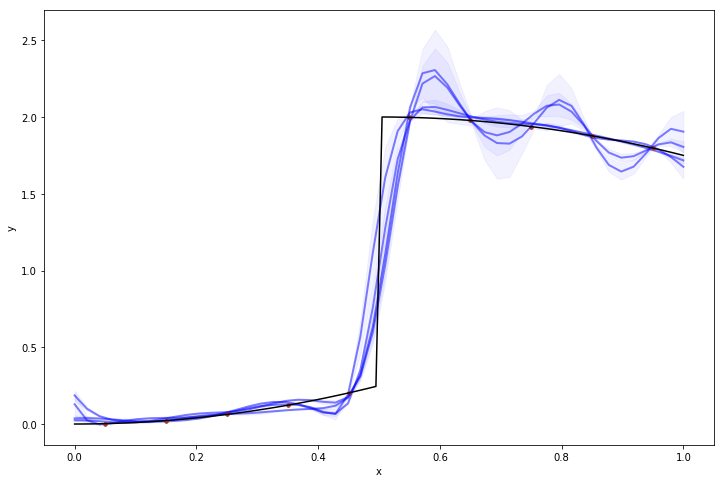

In [20]:
X_true = np.linspace(0,1,100)[:,None]
Y_true = np.array([objective(x) for x in X_true])[:, None]

mini = 105
maxi = 109
plt.figure(figsize=(12,8))

for i in xrange(mini,maxi):
    visualize(xnew, mean_f_mat[i,:], var_f_mat[i,:], noise_var[i])  
plt.plot(X_true, Y_true, 'k')

In [21]:
def visualize_l(Xgrid, M, L, U):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    
    line, = plt.plot(Xgrid, M, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], L, U,
                     color = 'b', alpha = 0.25)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

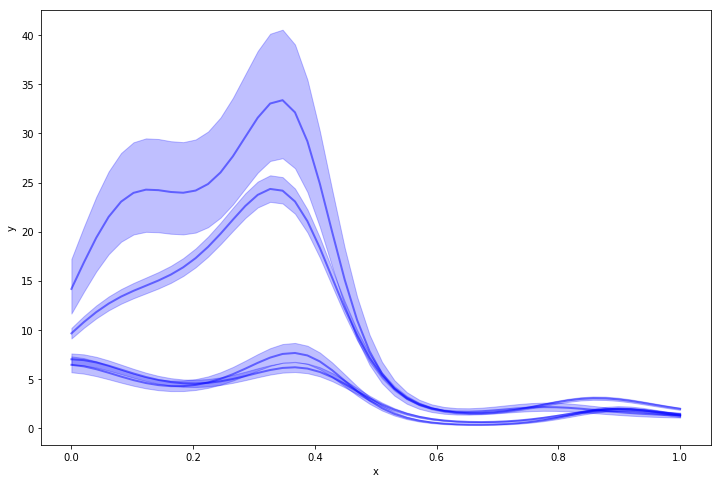

In [22]:
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize_l(xnew, MeanL[i,:], LowerL[i,:], UpperL[i,:])  